# Bagging Project 

In [1]:
#Import necessary libraries .
import numpy as np 
import pandas as pd


#For data Visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
#IMPORT Dataset
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There is No Null Values . So we are good to proceed . 


In [6]:
#Check Data Stats
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In my view user id is nominal data . is just for name shake . if we delete this we less our load .

In [7]:
data.drop(columns=['User ID'],inplace=True)

In [8]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
#Lets Conver Gender in Numeric By encoding technique

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lab_enc=LabelEncoder()

In [15]:
df2=lab_enc.fit_transform(data[['Gender']])
pd.Series(df2)
data['Gender']=df2

We Set 1 for Male and 0 For Female.

In [17]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [18]:
#Lets Check Relationsip by plotting Graph

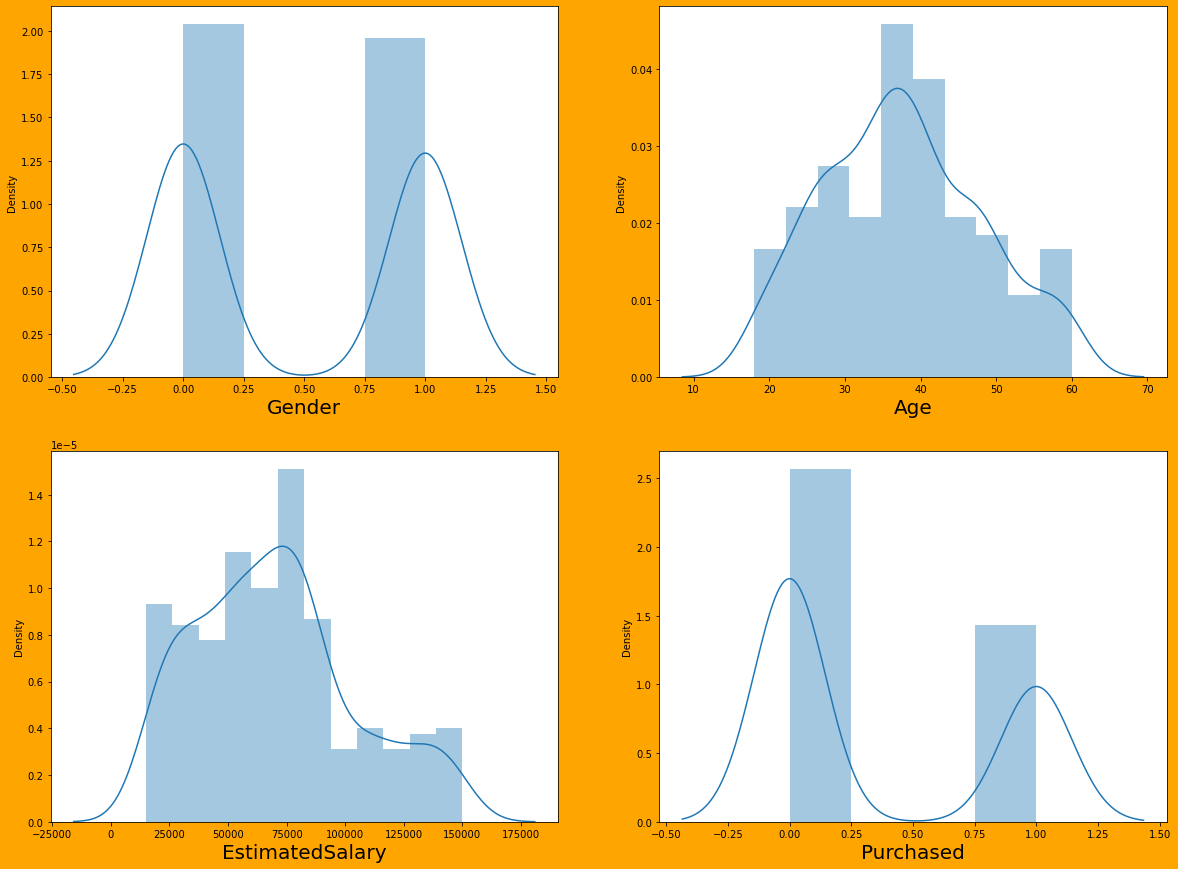

In [19]:
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in data:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()
        

In [20]:
#All Most our dataset is Normalyy Distributed.
#Lets do Normalization or Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()


In [26]:
x=data.drop(columns=['Purchased'])
y=data.Purchased

In [27]:
x_scaled=scaler.fit_transform(x)

In [28]:
x_scaled

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [29]:
#Lets do traine test split .

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

In [35]:
#Lets Create BaggingClassifier Model.
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
bg=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=5,bootstrap=True,oob_score=False,max_samples=.70,random_state=94255)

In [38]:
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.7,
                  n_estimators=5, random_state=94255)

In [40]:
bg.score(x_test,y_test)

0.86

In [42]:
bg.score(x_train,y_train)

0.8533333333333334

In [43]:
#Our Model is Good Model We good to go in prodution

In [44]:
#Student of DataScience
#Student of DataTrained- Saurav
#Date - 22-09-2022
#Time - 10:47